# Project 4:  House Price Prediction in Ames, IA

### Jill Cheney

Task: 

In [6]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import numpy as np
import matplotlib.pyplot as plt

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn library for importing the newsgroup data.
from sklearn.datasets import fetch_20newsgroups

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *

import nltk

import pandas as pd
import seaborn as sns
import scipy.stats as st

In [7]:
#To visualize the whole grid
pd.options.display.max_columns = 999

#Kaggle divides the dataset already into Train and Test data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")


### Exploratory Data Analysis

| Tasks |
| :- | 
| Understand & Visualize the data | 


1460 values exist in the data set with 80 explanatory variables.

In [8]:
train.head()
# train.info()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

Skew is: 1.882876
Kurtosis is: 6.536282


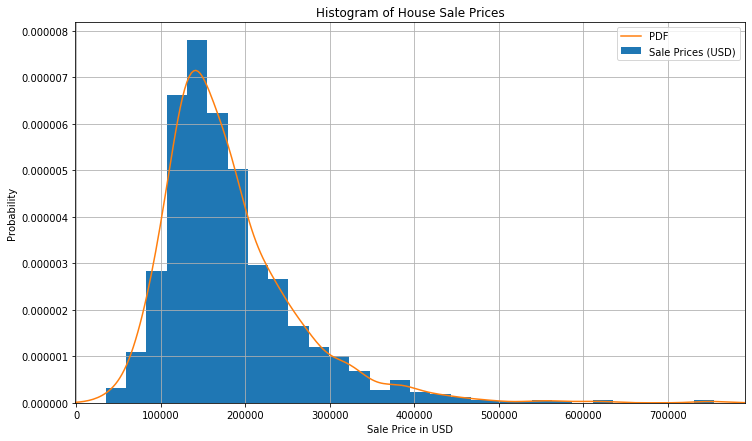

In [11]:
plt.figure(figsize = (12,7))
x = train.SalePrice
plt.hist(x, density = True, bins = 30, label = "Sale Prices (USD)")
mn, mx = plt.xlim()
plt.xlim(mn, mx)
kde_xs = np.linspace(mn, mx, 301)
kde = st.gaussian_kde(x)
plt.plot(kde_xs, kde.pdf(kde_xs), label = "PDF")
plt.grid()
plt.legend(loc = "upper right")
plt.ylabel('Probability')
plt.xlabel('Sale Price in USD')
plt.title("Histogram of House Sale Prices")

print("Skew is:", "%3f" % train.SalePrice.skew())
print("Kurtosis is:", "%3f" % train.SalePrice.kurt())


The sale price data is a right-skewed (positive) distribution.  The mean house price is 180K.  To address the skew and normalize the data, a log transformation was performed.

Text(0.5, 1.0, 'Histogram of House Sale Prices')

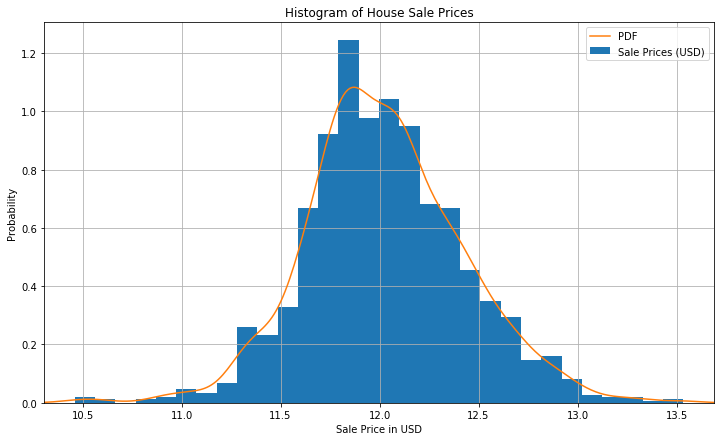

In [12]:
plt.figure(figsize = (12,7))
x = np.log(train.SalePrice)
plt.hist(x, density = True, bins = 30, label = "Sale Prices (USD)")
mn, mx = plt.xlim()
plt.xlim(mn, mx)
kde_xs = np.linspace(mn, mx, 301)
kde = st.gaussian_kde(x)
plt.plot(kde_xs, kde.pdf(kde_xs), label = "PDF")
plt.grid()
plt.legend(loc = "upper right")
plt.ylabel('Probability')
plt.xlabel('Sale Price in USD')
plt.title("Histogram of House Sale Prices")


The logistic transformation allows the data set to essentially fit a Gaussian distribution, which is depicted by the PDF line on the graph.  The Kaggle Competition indicates that submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price.  Acknowledging this, the log of the sale price represents the target value for evaluation.

In [13]:
# Transform SalePrice varialbe to a log value
train.SalePrice = np.log(train.SalePrice)

In [ ]:
# counts of zoning classification - how is it distributed and what are definitions?

In [ ]:
# count by neighborhood - what are counts by each - cross reference against schools

### School Factor

Element that was missing in this was the school factor.  The following describes the Ames, IA schools per US News & World Report) and GreatSchools.org:
1. The city district has one high school.  It has an enrollment of 1328 with a student ratio of 18:1.  Overall, its ranking is 97.22 and has a national ranking of 494 per US News & World Report.  It is the #1 ranked HS in IA.

2. 5 elementary school feed the highschool.  All rank between 7-9 on GreatSchools.org, which are all above average rankings.

Opinion:  Given the uniform above average quality of the schools, there is no reason to assume that school districts factor significantly into the housing sales in Ames, IA.  Neighborhood parameter not a critical one for the analysis.

### Data Pre-Processing

| Tasks |
| :- | 
| Analysis & Imputation of Missing Variables | 
| Create shortlist of Most Important Features |

### features to consider - individual assessment

1. LotArea - lot size in square feet
2. OverallQual - overall condition of the house?  current maintenance would be desired 
as mortgage  to income would leave little room for large home expenses (roof ex)
3. YearBuild - year house was built
4. basement? on the fence on this one can use bsmtqual or bsmtcond with NA or functional(NA) or bsmt size
5. GarageCars - size of garage with the average being 2 for sales
6. CentralAir - does air conditioning exist - should consider for resale value/desirability
7. square feet:  Ground floor and 1stFlrSF and 2ndFlrSF - would look at consolidating these
I think this means a 3 story house if all exist - I think 1st floor is US second story? need to confirm
Q:  is that what GrLvArea does?
8. Sale date:  MoSold & YrSold?  tends to be a annual cycle in real estate - consider whether to consider?

OML:  1, 5, 7, 2, 4, 3, 6, 8



In [66]:
# Obtain correlations of each of the numerical categories to the SalePrice
corr = train.corr(method = 'pearson')
sale_corr = corr.iloc[[0,-1]].T
print("Total number of numerical categories: ", len(sale_corr), '\n')

# isolate the top variables that correlate to sale price statistically
most_corr = sale_corr['SalePrice'].sort_values(ascending = False)[:21]
print("Most statistically correlated parameters to SalePrice: ", '\n')
print(most_corr, '\n'*2)

# isolate the variables that correlate least to sale price staticstically
least_corr = sale_corr['SalePrice'].sort_values()[:-20]
print("Least statistically correlated parameters to SalePrice: ", '\n')
print(least_corr)


Total number of numerical categories:  38 

Most statistically correlated parameters to SalePrice:  

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.351799
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
HalfBath        0.284108
LotArea         0.263843
Name: SalePrice, dtype: float64 


Least statistically correlated parameters to SalePrice:  

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.

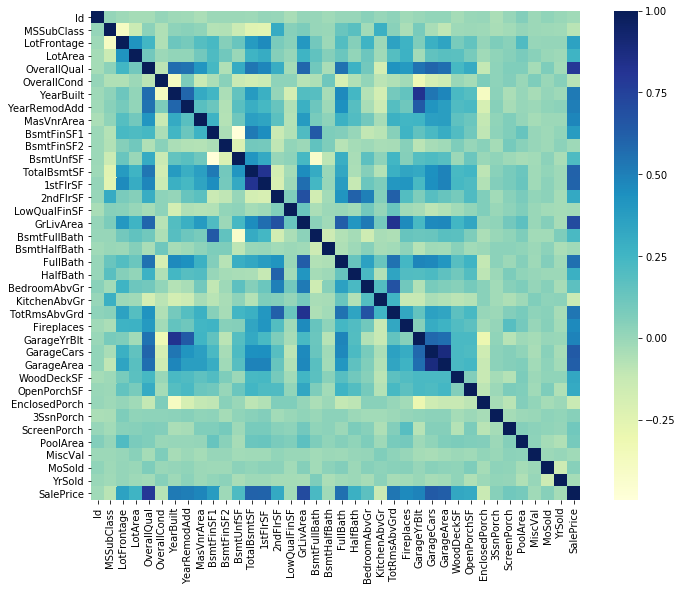

In [72]:
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corr, square = True, cmap ="YlGnBu")

Observations:

1.  LotArea - actually on the bottom list!  Interesting, but I appreciate why - it is definitely an individual preference.  When it comes to city lots, it is less a priority than an essential element.  Though for me, I would always be wanting to optimize it.

2. OverallQual - top parameter that is correlated to sale price.  That is consistent with the assessment of the area and the average sale price.  The average sale price for the data set is 180K.  On a 30 year mortgage, that sorts out to about a 800-ish USD monthly mortgage payment.  Given the average income for the area, monthly debt to income ratio would be 1400-1500 USD ish (which generally assumes dual household income).  By the time one factors in car payments and other recuring monthly expenses, there would be limited resources for unexpected large expenses, such as house repairs/improvements.  Contextually, it is consistent that folk seek the best maintained home they can afford.

3. Basement - lots of ways to describe this one within the data set.  What is interesting here is what came up high on the list and what was low.  The boolean value of the existence of a basement is irrelevent within this analysis.  With some extra noodling, that makes sense, though it would be excluded anyway.  Focusing on what exists to evaluate is most important.  Using the TotalBsmtSF represents a good start point of this feature.

4. YearBuild - Ended up fairly high on the correlation list.  From looking at the data, about 60% of the homes are no more than 40 years old - 1970 and newer.  This also means that these homes would not require lead abatement issues for the most part, another potential unexpected expense in a house purchase.  In the end, I would imagine that the house quality drives the value more than the build year.  Further the paramter of when a remodel factors in; however, again, all of this stears toward a way to evalute the overall quality of the home.  In short, newer or recently remodeled homes would be more desirable, as they would assumedly need less potential upkeep.

5. GarageCars - This one had a high correlation.  Interestingly two parameters emerged: GarageCars and GarageArea.  These capture the same trait, but in different ways.  I believe GarageCars represents a better parameter to use, as it is easier to visualize for the average homebuyer.  Square footage means less when describing a garage.

6. SquareFeet - It appears that three variables are used to describe the composite size of any one house. A start point would be to keep the ground floor footage unique, and then consolidate the upper floors.  A single level home has its own market niche in real estate.

7. CentralAir - not a numerical category so not included

8. Sale date - not a numerical category so not included

Of the 6 numerical parameters, 5 were one the top list, with all in the top 10.  Noticable categorical omissions were the presence of a full bath and remodel year.  Remodel year ties into the overall quality parameter.  Both would be measuring similar characteristics of the house.

Interesting things:
Overall quality and overall condition I would think would have high collinearlity.  Overall quality has a high positive correlation while overall condition has a negative correlation.....a curiosity.

Can't let this one go....
OverallQual rates the overall material and finish of the house and OverallCond rates the overall condition of the house.  Both are on a scale of one to 10, but overall condition has a negative correlation.

Final numerical parameters that I would consider:

1. OverallQual
2. GarageCars
3. TotalBsmtSF
4. GrdLivArea
5. TotalLivArea - add 1stFlrSF and 2ndFlrSF together:  this is actually the GrLivArea variable
6. YearBuilt - but consider bucketizing the years into categories

The heatmap isn't that useful, even when done for only the SalePrice.  The numerical list provides a better analysis too for me.  Too many overlapping variables exist in the dataset - too much multicollinearity.


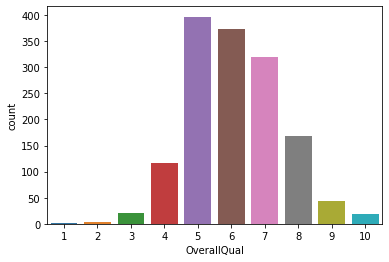

In [87]:
sns.countplot(train.OverallQual)

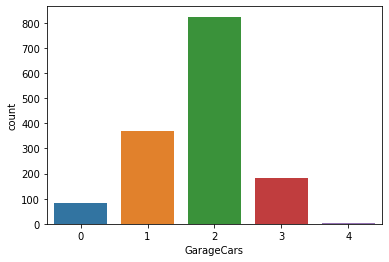

In [76]:
sns.countplot(train.GarageCars)

### Feature Engineering

| Tasks |
| :- | 
| Transform & Scale Features | 
| Derive Variables as Required |
| Determine Interaction Variables as Required |

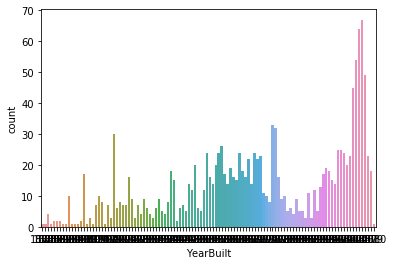

In [17]:
### YearBuilt

sns.countplot(train.YearBuilt)
# should bucketize these into parsable groups
# 38% NMT 20 years old (1990-2010) - 551
# 17% 20-40 years old(1970-1989) – 249
# 23% 40-60 years old (342)
# 22% (318) rest


In [19]:
# train['YearBuilt'].value_counts()
criteria = [train['YearBuilt'].between(1990,2010), train['YearBuilt'].between(1970, 1989), 
            train['YearBuilt'].between(1950,1969), train['YearBuilt'].between(1850,1949)]

values = [1, 2, 3, 4]

train['YB_Cat'] = np.select(criteria, values, 0)
train['YB_Cat'].value_counts()

1    551
3    342
4    318
2    249
Name: YB_Cat, dtype: int64

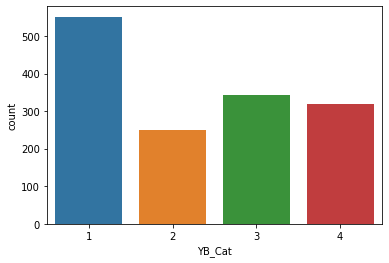

In [20]:
sns.countplot(train.YB_Cat)
# fairly even distribution, which depicts a recent building boom in the last 20 years
# compared to previous periods

In [24]:
# Non-numerical parameter evaluation
# train.apply(lambda x: x.factorize()[0]).corr()

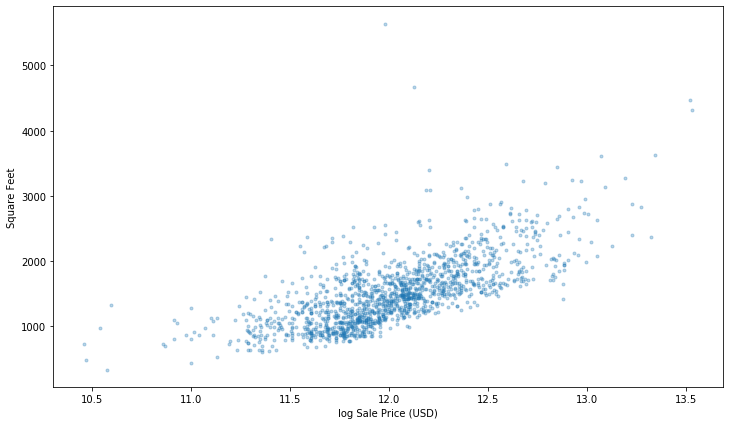

In [103]:
#aggregate upper floors into one variable - this is acutally the GrLivArea value
# train['UpperFlrSF'] = train['1stFlrSF'] + train['2ndFlrSF']
# train['totalSF'] = train[]
# sns.countplot(train.GrLivArea)
plt.figure(figsize = (12,7))
plt.xlabel("log Sale Price (USD)")
plt.ylabel("Square Feet")
plt.plot(np.log(train.SalePrice),train.GrLivArea, '.', alpha = 0.3)
            

In [22]:
criteria = [train['GrLivArea'].between(0,1500), train['GrLivArea'].between(1501, 2000), 
            train['GrLivArea'].between(2001,3000), train['GrLivArea'].between(3001,10000)]

values = [1, 2, 3, 4]

train['SF_Cat'] = np.select(criteria, values, 0)
train['SF_Cat'].value_counts()

# Cat1 covers all data up to the mean (1515) essentially

1    785
2    461
3    196
4     18
Name: SF_Cat, dtype: int64

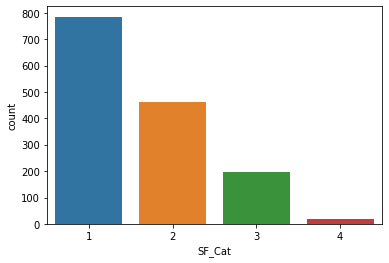

In [23]:
sns.countplot(train.SF_Cat)

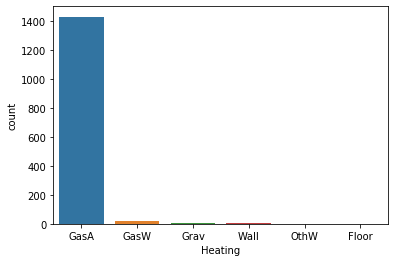

In [25]:
sns.countplot(train.Heating)
# essentially all the homes use register heating
# no unique nuance to be gained

Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64

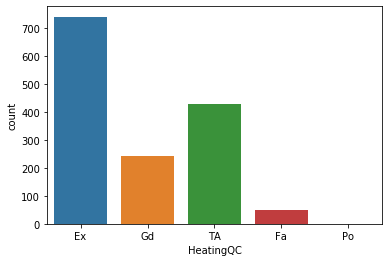

In [28]:
sns.countplot(train.HeatingQC)
train["HeatingQC"].value_counts()
# Heating system quality may be a worthwhile consideration

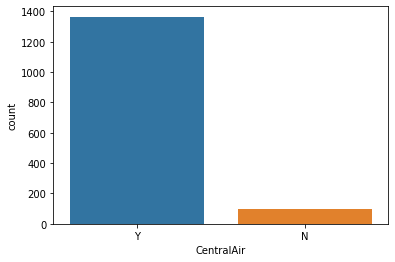

In [29]:
sns.countplot(train.CentralAir)
# essentially all homes have air conditioning now - always an issue for summer

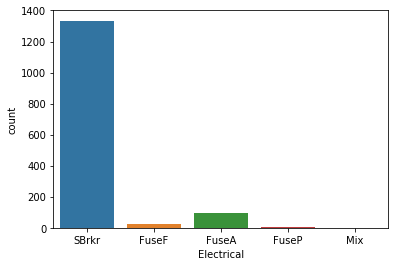

In [30]:
sns.countplot(train.Electrical)
# most homes have had their wiring upgraded if they were older builds
# almost all the knob & tube has been replaced
# essentially all homes have no less then average wiring - at least 60 AMP fuse box

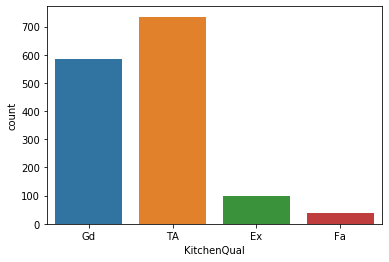

In [31]:
sns.countplot(train.KitchenQual)
# majority of homes have an acceptable kitchen - specifically one that would not need
# an immediate upgrade - perfectly functional/modern though perhaps an 80's vinatage

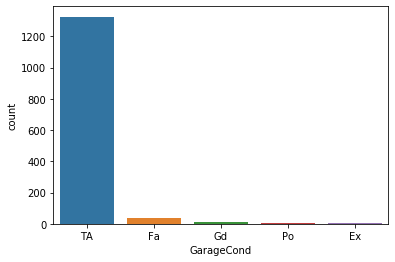

In [32]:
sns.countplot(train.GarageCond)
# typical/average is the order of the day for garage condition - no discrimator here

In [40]:
# train["EnclosedPorch"].value_counts()
# train["3SsnPorch"].value_counts()
train["ScreenPorch"].value_counts()

# Porch perspective:  desirable, especially screened ones.
# Issue:  uniform term use - enclosed and 3 season can be interchangable
# these are the classic 'enclosed in the original porch to have more space' solutions
# a more reasonable variable may be a boolean:  porch (Y/N) but not sure it is signficant

0      1344
192       6
224       5
120       5
189       4
180       4
160       3
168       3
144       3
126       3
147       3
90        3
200       2
198       2
216       2
184       2
259       2
100       2
176       2
170       2
288       2
142       2
153       1
154       1
152       1
155       1
145       1
156       1
143       1
322       1
       ... 
163       1
165       1
291       1
287       1
276       1
273       1
271       1
266       1
265       1
263       1
260       1
252       1
234       1
233       1
225       1
374       1
222       1
220       1
210       1
204       1
197       1
385       1
190       1
396       1
185       1
182       1
440       1
178       1
312       1
480       1
Name: ScreenPorch, Length: 76, dtype: int64

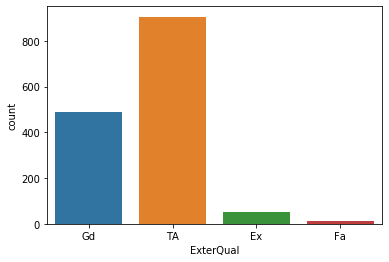

In [41]:
sns.countplot(train.ExterQual)

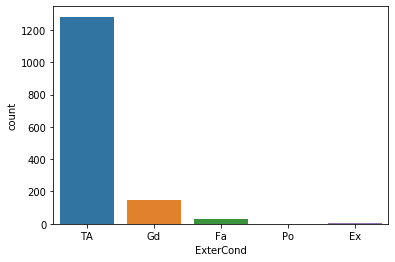

In [42]:
sns.countplot(train.ExterCond)

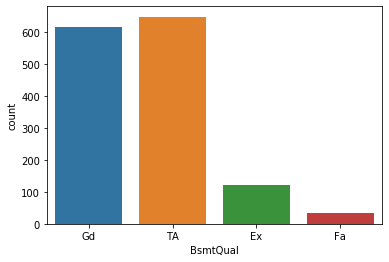

In [43]:
sns.countplot(train.BsmtQual)
# all walk-in height - nothing unique

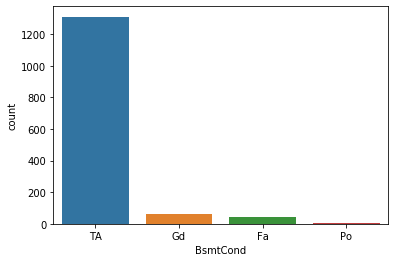

In [44]:
sns.countplot(train.BsmtCond)
# nothing significant here nor unexpected - not an area that one would expect wet basements

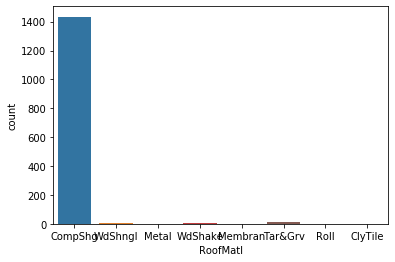

In [45]:
sns.countplot(train.RoofMatl)
# not useful - almost all have converted or built with composition shingles

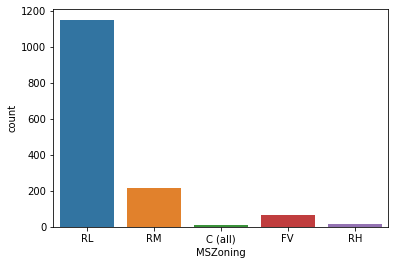

In [46]:
sns.countplot(train.MSZoning)
# essentially nothing is high density zoning

### Modeling

### Hyper Parameter Tuning

### Ensemble